In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel("Real estate valuation data set.xlsx")

df.head()








,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


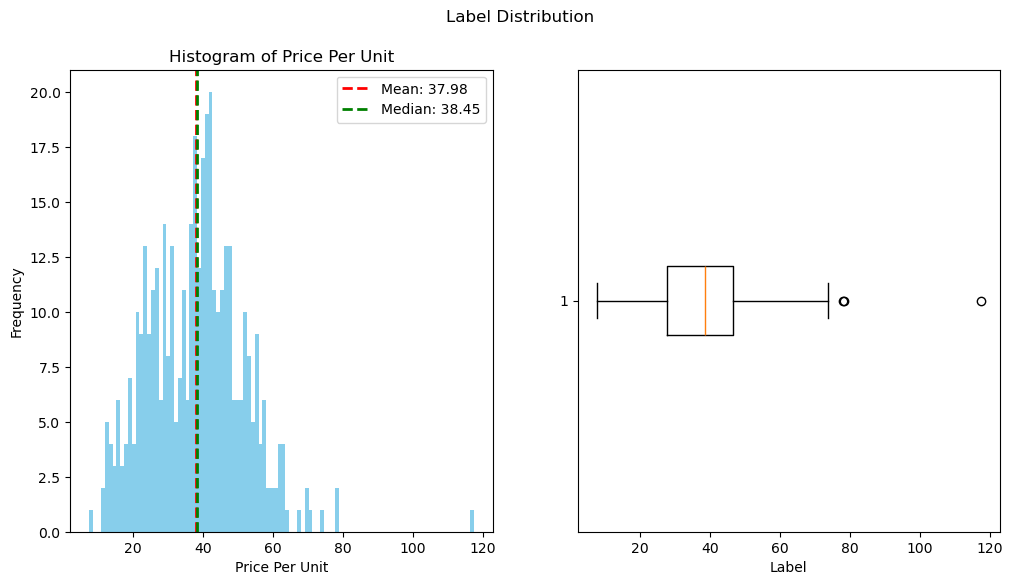

In [44]:
price_per_unit = df['Y house price of unit area']

fig, ax = plt.subplots(1,2,figsize=(12,6))

ax[0].hist(price_per_unit, bins=100, color = 'skyblue')

ax[0].set_title('Histogram of Price Per Unit')
ax[0].set_xlabel('Price Per Unit')
ax[0].set_ylabel('Frequency')

mean_price = price_per_unit.mean()
median_price = price_per_unit.median()
ax[0].axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price:.2f}')
ax[0].axvline(median_price, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_price:.2f}')
ax[0].legend()

ax[1].boxplot(price_per_unit,vert = False)
ax[1].set_xlabel('Label')

plt.suptitle('Label Distribution')

plt.show()


Text(0.5, 0, 'Price Per Unit')

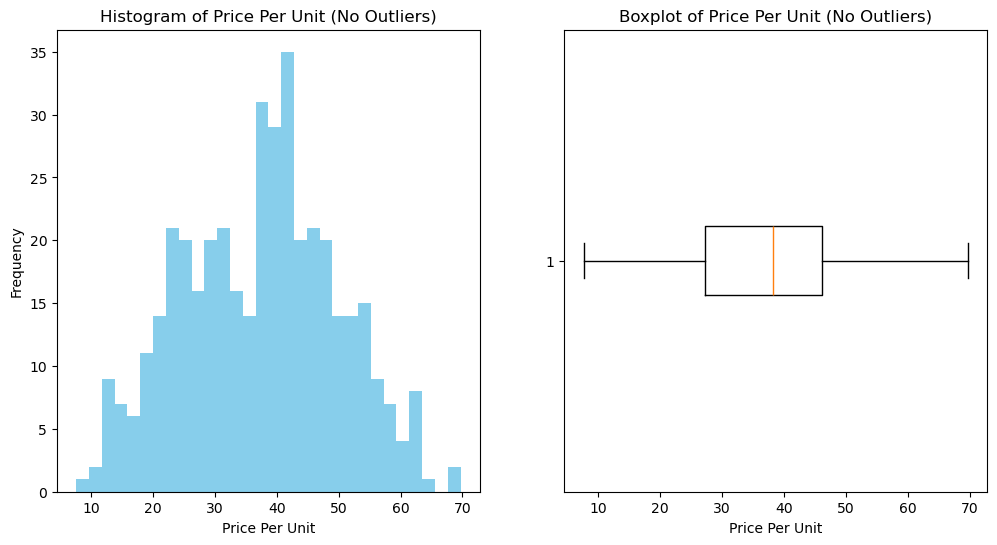

In [45]:
df = df[df['Y house price of unit area'] < 70]

price_per_unit = df['Y house price of unit area']

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the histogram without outliers
ax[0].hist(price_per_unit, bins=30, color='skyblue')
ax[0].set_title('Histogram of Price Per Unit (No Outliers)')
ax[0].set_xlabel('Price Per Unit')
ax[0].set_ylabel('Frequency')

# Plot the boxplot without outliers
ax[1].boxplot(price_per_unit, vert=False)
ax[1].set_title('Boxplot of Price Per Unit (No Outliers)')
ax[1].set_xlabel('Price Per Unit')

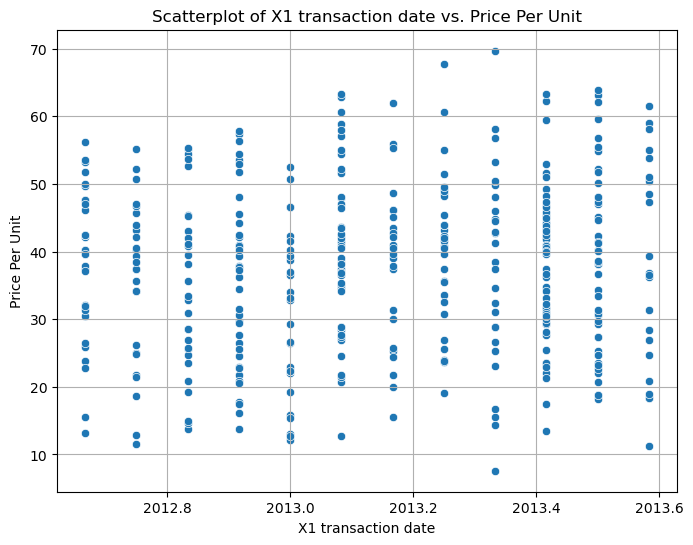

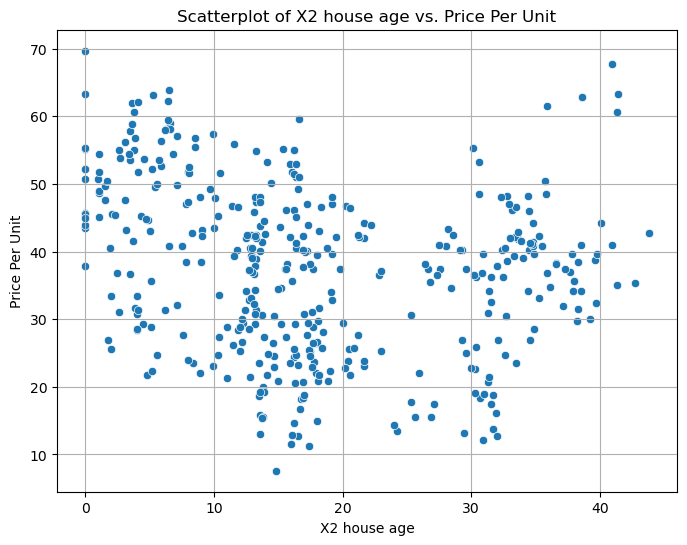

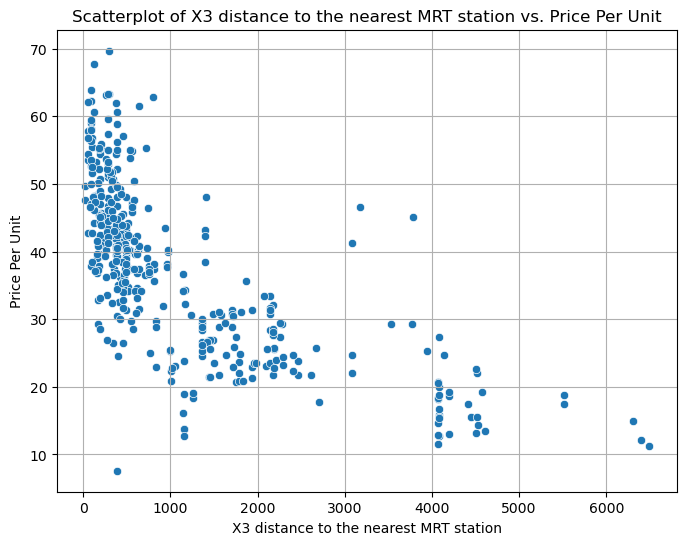

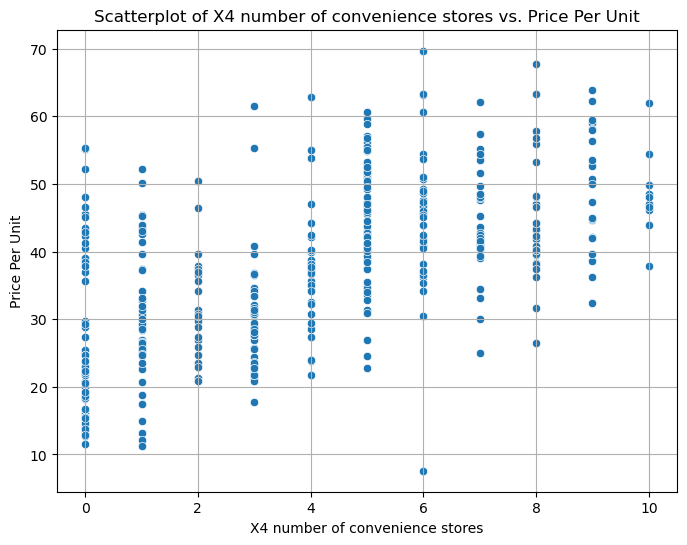

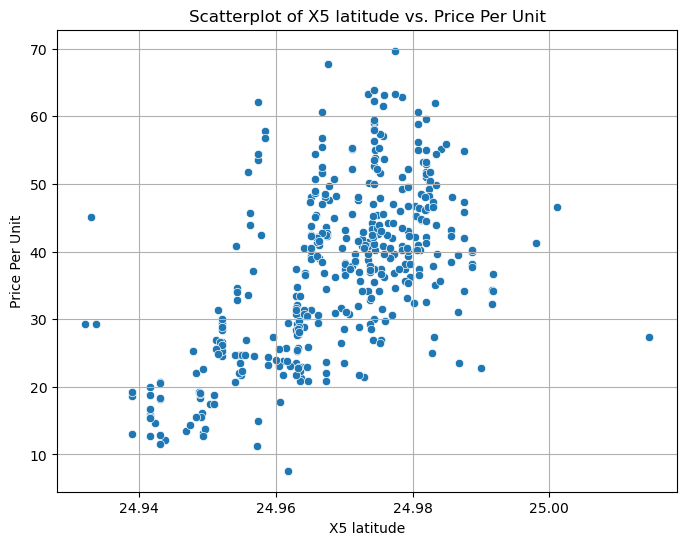

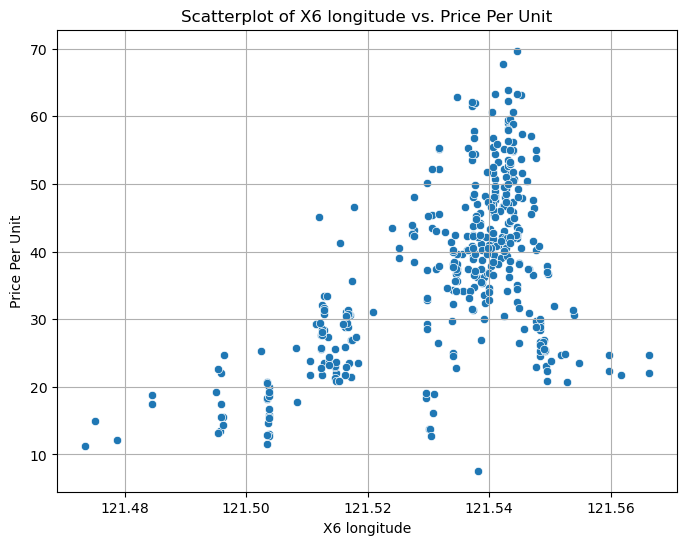

In [46]:
sel_columns = df.drop(columns=['Y house price of unit area','No'])

for column in sel_columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column, y=price_per_unit, data=df)
    plt.title(f'Scatterplot of {column} vs. Price Per Unit')
    plt.xlabel(column)
    plt.ylabel('Price Per Unit')
    plt.grid(True)
    plt.show()


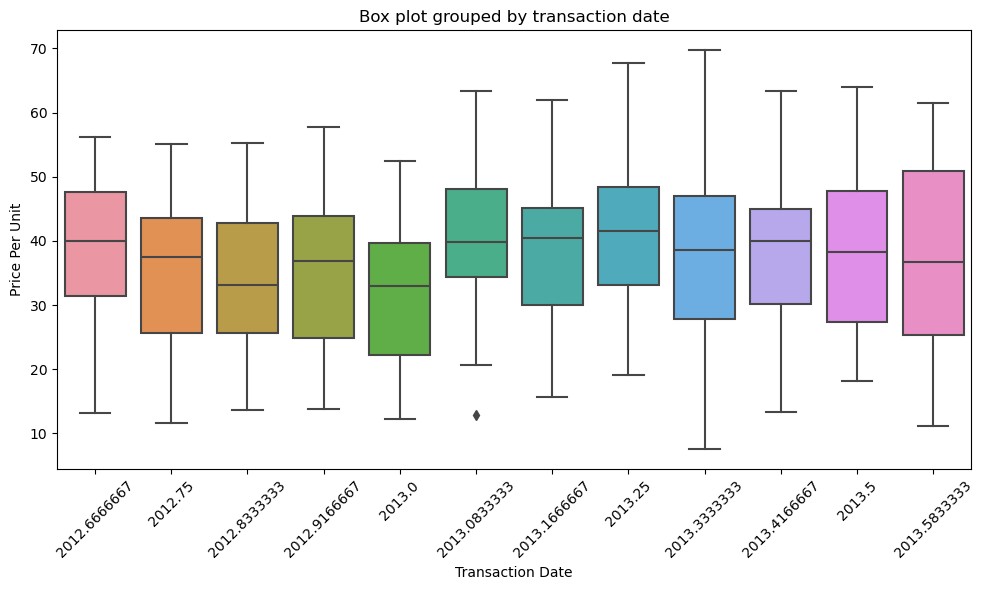

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='X1 transaction date', y=price_per_unit, data=df)
plt.title('Box plot grouped by transaction date')
plt.xlabel('Transaction Date')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

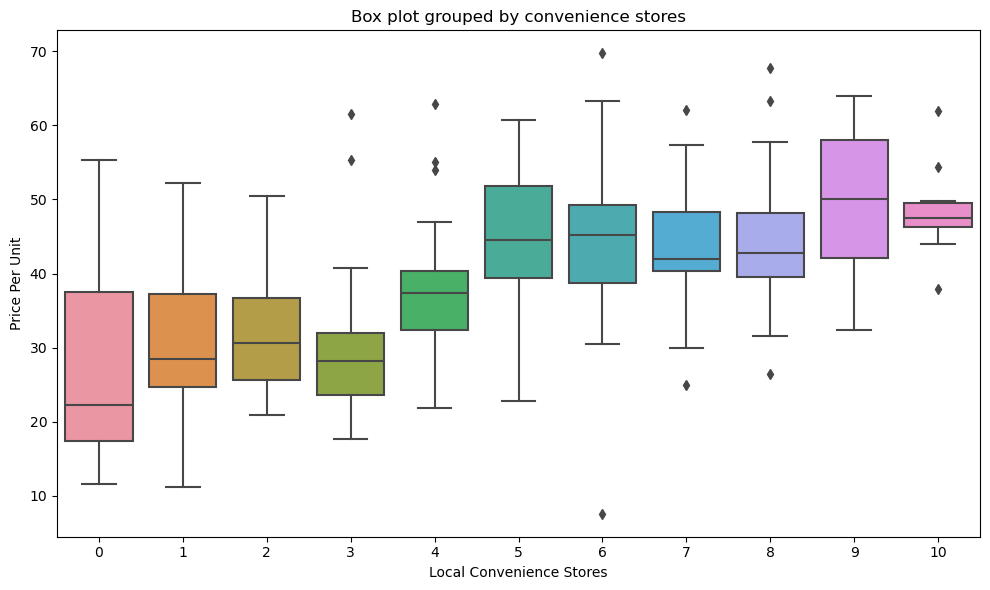

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='X4 number of convenience stores', y=price_per_unit, data=df)
plt.title('Box plot grouped by convenience stores')
plt.xlabel('Local Convenience Stores')
plt.ylabel('Price Per Unit')
plt.tight_layout()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['No','Y house price of unit area'])
y = price_per_unit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set - Features:", X_train.shape, " Labels:", y_train.shape)
print("Testing set - Features:", X_test.shape, " Labels:", y_test.shape)



Training set - Features: (285, 6)  Labels: (285,)
Testing set - Features: (123, 6)  Labels: (123,)


In [56]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer


numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())  # Normalize the numeric features
])

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


model = pipeline.fit(X_train, y_train)

print(model)


train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print("Training R^2 score:", train_score)
print("Testing R^2 score:", test_score)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor())])
Training R^2 score: 0.970508093428248
Testing R^2 score: 0.7388867481362886


Training MSE: 4.457600757724051
Testing MSE: 43.03082635518484
Training RMSE: 2.111303094708112
Testing RMSE: 6.55978859073864


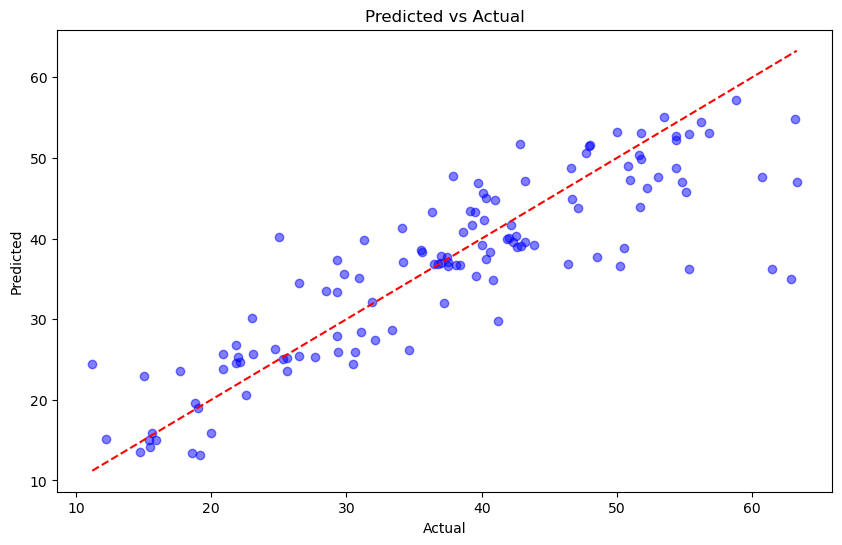

In [57]:
from sklearn.metrics import mean_squared_error



y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)
print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title('Predicted vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [60]:
from joblib import dump, load

# Save the trained model
dump(pipeline, 'random_forest_regressor_model.joblib')

# Load the saved model
loaded_model = load('random_forest_regressor_model.joblib')

# Define new real estate transactions
new_transactions = pd.DataFrame({
    'X1 transaction date': [2013.167, 2013.0],
    'X2 house age': [16.2, 13.6],
    'X3 distance to the nearest MRT station': [289.3248, 4082.015],
    'X4 number of convenience stores': [5, 0],
    'X5 latitude': [24.98203, 24.94155],
    'X6 longitude': [121.54348, 121.50381]
})

# Use the loaded model to predict the price-per-unit for new transactions
predicted_prices = loaded_model.predict(new_transactions)

# Print the predicted prices
print("Predicted price-per-unit for new transactions:")
for i, price in enumerate(predicted_prices):
    print(f"Transaction {i+1}: ${price:.2f}")


Predicted price-per-unit for new transactions:
Transaction 1: $48.51
Transaction 2: $15.07
